In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/Carlos/Downloads/archive/amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.
Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.



In [3]:
# Crear crosstab
crosstab = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')

# Calcular proporción de Best-Sellers
crosstab['best_seller_proportion'] = crosstab[True]

# Ordenar las categorías por proporción de Best-Sellers
sorted_crosstab = crosstab.sort_values(by='best_seller_proportion', ascending=False)

print(sorted_crosstab.head())

isBestSeller                       False      True  best_seller_proportion
category                                                                  
Grocery                         0.941865  0.058135                0.058135
Smart Home Security & Lighting  0.942308  0.057692                0.057692
Health & Personal Care          0.942314  0.057686                0.057686
Mobile Phone Accessories        0.957529  0.042471                0.042471
Power & Hand Tools              0.964661  0.035339                0.035339


In [4]:
from scipy.stats import chi2_contingency
import numpy as np

# Tabla de contingencia
contingency = pd.crosstab(df['category'], df['isBestSeller'])

# Prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency)

# Calcular Cramér's V
n = contingency.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape)-1)))

print(f"Chi-cuadrado: {chi2}, p-valor: {p}, Cramér's V: {cramers_v}")

Chi-cuadrado: 36540.20270061387, p-valor: 0.0, Cramér's V: 0.1222829439760564


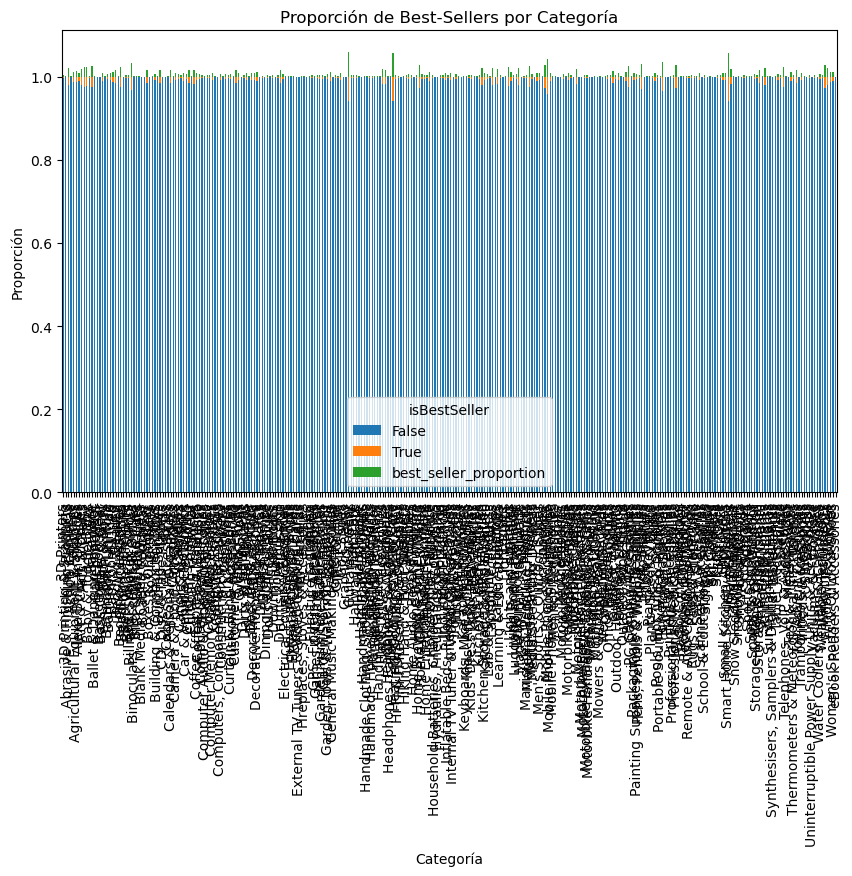

In [5]:
import matplotlib.pyplot as plt

# Graficar
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proporción de Best-Sellers por Categoría')
plt.ylabel('Proporción')
plt.xlabel('Categoría')
plt.show()

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.
Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.
Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [6]:
# Calcular IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
df_no_outliers = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

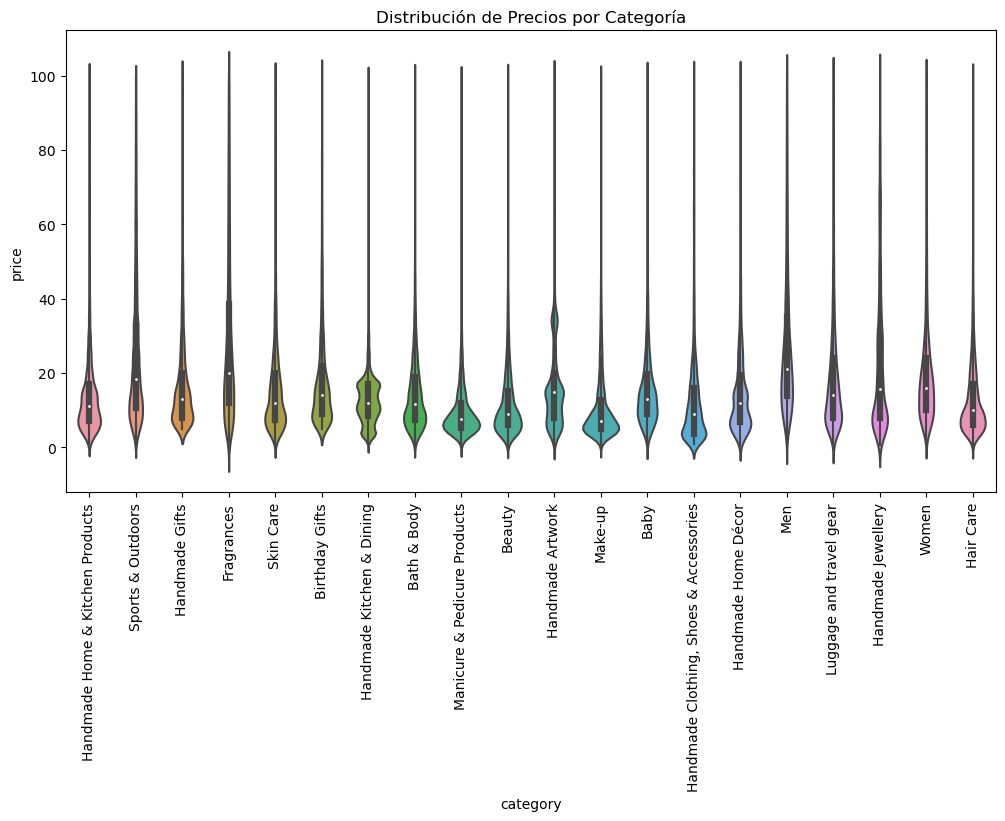

In [7]:
import seaborn as sns

# Top 20 categorías
top_20_categories = df_no_outliers['category'].value_counts().index[:20]

# Filtrar por estas categorías
df_filtered = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

# Graficar
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='price', data=df_filtered)
plt.xticks(rotation=90)
plt.title('Distribución de Precios por Categoría')
plt.show()

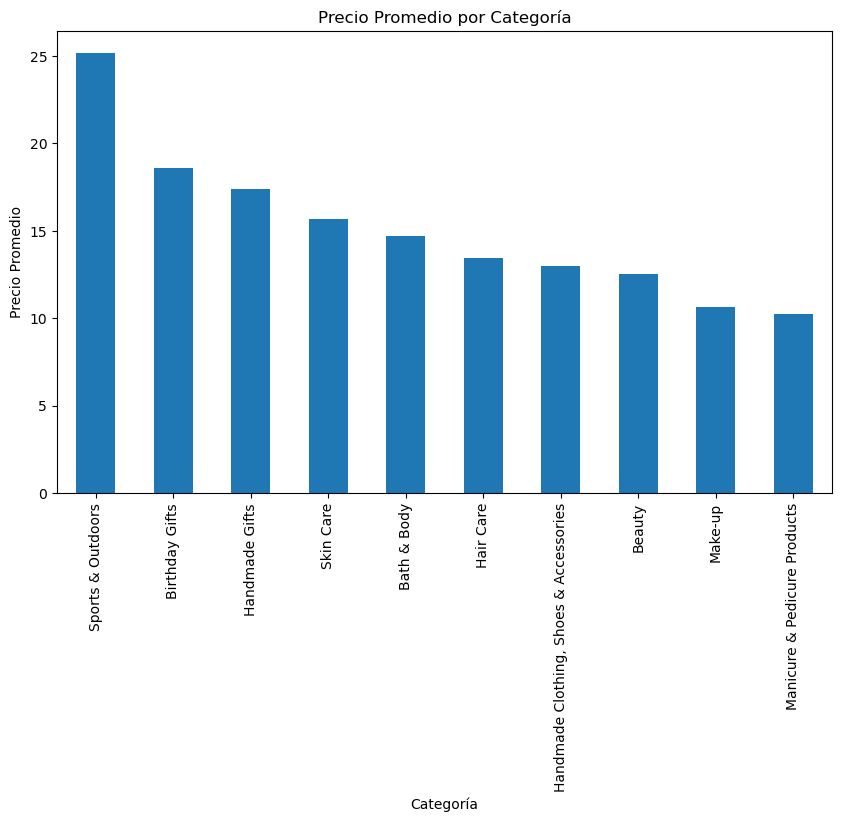

In [8]:
# Top 10 categorías por cuenta
top_10_categories = df_no_outliers['category'].value_counts().index[:10]

# Filtrar por esas categorías
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Calcular precios promedio
avg_price_per_category = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)

# Graficar
avg_price_per_category.plot(kind='bar', figsize=(10, 6))
plt.title('Precio Promedio por Categoría')
plt.ylabel('Precio Promedio')
plt.xlabel('Categoría')
plt.show()

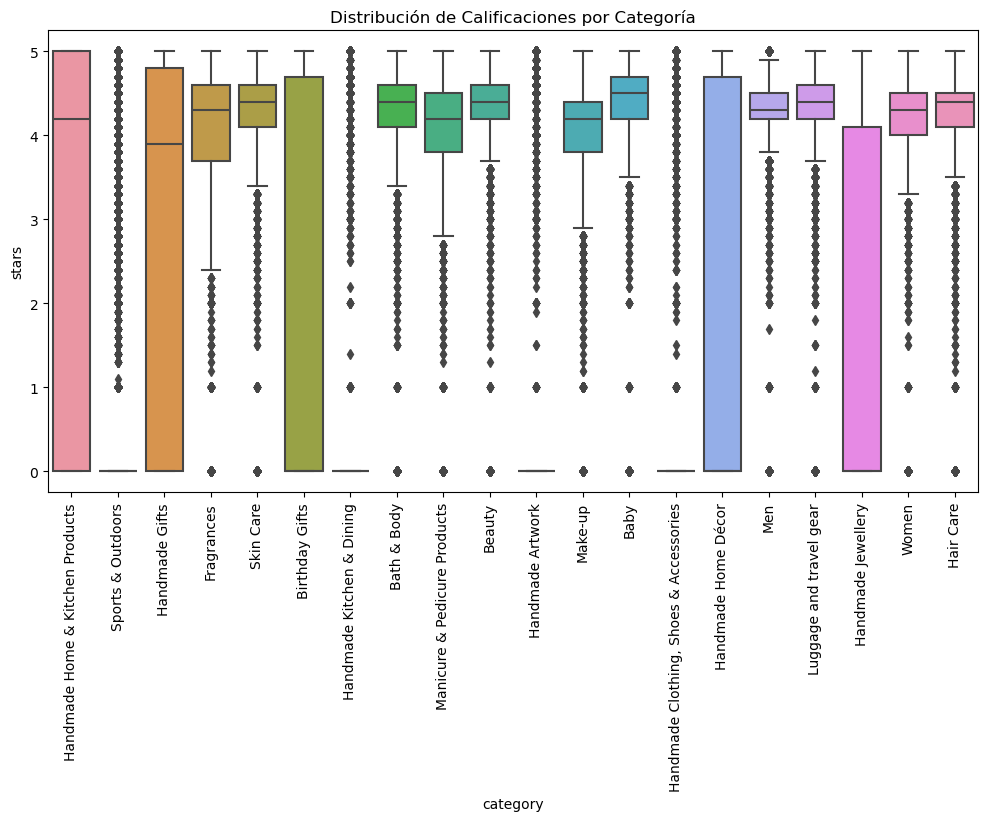

In [9]:
# Graficar boxplots de estrellas por categoría
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='stars', data=df_filtered)
plt.xticks(rotation=90)
plt.title('Distribución de Calificaciones por Categoría')
plt.show()


Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?
Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

In [10]:
# Calcular correlación entre precio y calificación
correlation = df[['price', 'stars']].corr()
print(correlation)

          price     stars
price  1.000000 -0.124907
stars -0.124907  1.000000


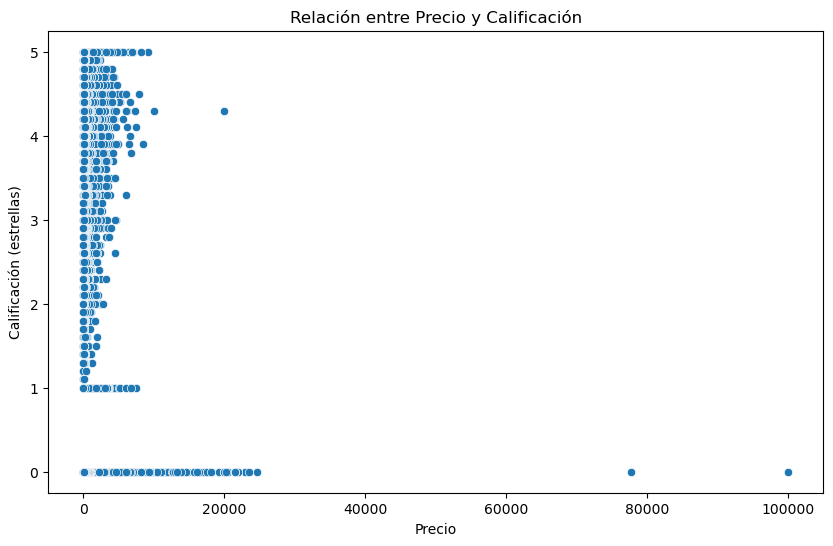

In [11]:
# Graficar scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df)
plt.title('Relación entre Precio y Calificación')
plt.xlabel('Precio')
plt.ylabel('Calificación (estrellas)')
plt.show()

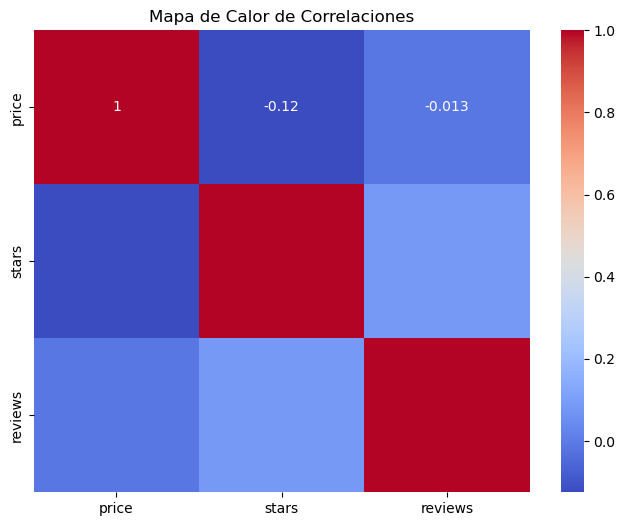

In [12]:
# Mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(df[['price', 'stars', 'reviews']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

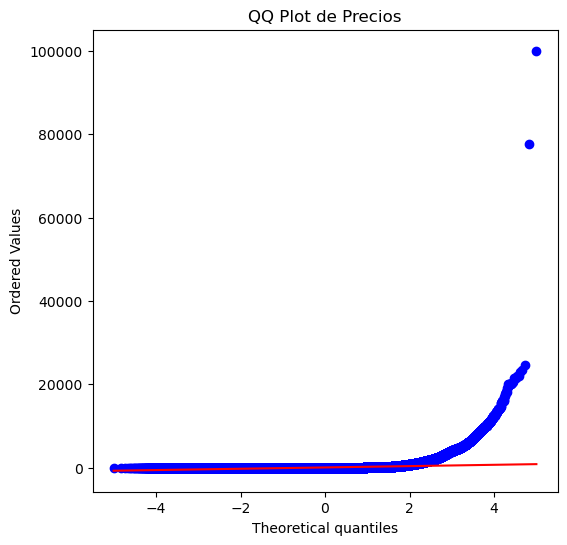

In [13]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Graficar QQ plot
plt.figure(figsize=(6, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot de Precios')
plt.show()